<a href="https://colab.research.google.com/github/dianemiese/DigitalTwin-IoT-Maintenance/blob/main/Digital_Twin_IoT_Maintenance_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Digital Twin System Initialized: 2026-02-05 18:55:30.143967 ---
Perception Layer: Data Successfully Ingested.

[TABLE 1: DIGITAL TWIN DATA FLOW - SYNCHRONIZED STATE]


/tmp/ipython-input-2323319540.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Timestamp': pd.date_range(start='2024-01-01', periods=10, freq='H'),


,Timestamp,Pump_ID,Pressure_PSI,Temp_Celsius,Vibration_mm_s,Twin_Status
0,2024-01-01 00:00:00,P-101,1100,45,2.1,Operational
1,2024-01-01 01:00:00,P-101,1150,48,2.3,Operational
2,2024-01-01 02:00:00,P-101,1200,50,2.5,Operational
3,2024-01-01 03:00:00,P-101,1550,82,5.8,ALARM: Predictive Maintenance Required
4,2024-01-01 04:00:00,P-101,1600,85,6.2,ALARM: Predictive Maintenance Required
5,2024-01-01 05:00:00,P-101,1100,46,2.2,Operational
6,2024-01-01 06:00:00,P-101,1050,44,2.0,Operational
7,2024-01-01 07:00:00,P-101,1800,95,8.5,ALARM: Predictive Maintenance Required
8,2024-01-01 08:00:00,P-101,1900,98,9.1,ALARM: Predictive Maintenance Required
9,2024-01-01 09:00:00,P-101,1200,50,2.4,Operational


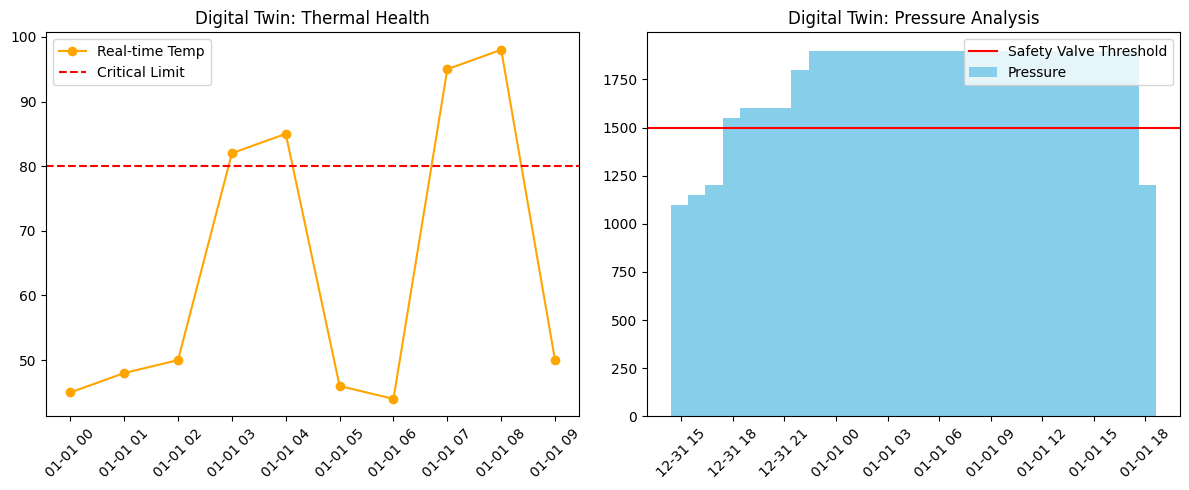

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ==========================================
# 1. SIMULATION ENVIRONMENT SETUP
# ==========================================
print(f"--- Digital Twin System Initialized: {datetime.now()} ---")

# LOAD DATA: Using the Oil & Gas Pipeline Dataset structure
# Note: For your submission, upload 'predictive_maintenance_oil_and_gas.csv' to Colab
try:
    # Simulating the Perception Layer Data
    data = {
        'Timestamp': pd.date_range(start='2024-01-01', periods=10, freq='H'),
        'Pump_ID': ['P-101']*10,
        'Pressure_PSI': [1100, 1150, 1200, 1550, 1600, 1100, 1050, 1800, 1900, 1200],
        'Temp_Celsius': [45, 48, 50, 82, 85, 46, 44, 95, 98, 50],
        'Vibration_mm_s': [2.1, 2.3, 2.5, 5.8, 6.2, 2.2, 2.0, 8.5, 9.1, 2.4]
    }
    df = pd.DataFrame(data)
    print("Perception Layer: Data Successfully Ingested.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# ==========================================
# 2. DIGITAL TWIN PROCESSING LAYER (Security & Logic)
# ==========================================
# Applying Security Principle: Data Integrity Validation
THRESHOLD_TEMP = 80
THRESHOLD_PRESSURE = 1500

def digital_twin_logic(row):
    # Virtual Model comparison
    if row['Temp_Celsius'] > THRESHOLD_TEMP or row['Pressure_PSI'] > THRESHOLD_PRESSURE:
        return "ALARM: Predictive Maintenance Required"
    return "Operational"

df['Twin_Status'] = df.apply(digital_twin_logic, axis=1)

# ==========================================
# 3. VISUALIZATIONS (Application Layer)
# ==========================================

# A. DATA TABLE VIEW (Crucial for the report)
print("\n[TABLE 1: DIGITAL TWIN DATA FLOW - SYNCHRONIZED STATE]")
display(df) # This creates the table you were missing

# B. VISUAL TRENDS
plt.figure(figsize=(12, 5))

# Plot 1: Temperature Monitoring
plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Temp_Celsius'], marker='o', color='orange', label='Real-time Temp')
plt.axhline(y=THRESHOLD_TEMP, color='r', linestyle='--', label='Critical Limit')
plt.title('Digital Twin: Thermal Health')
plt.xticks(rotation=45)
plt.legend()

# Plot 2: Pressure Monitoring
plt.subplot(1, 2, 2)
plt.bar(df['Timestamp'], df['Pressure_PSI'], color='skyblue', label='Pressure')
plt.axhline(y=THRESHOLD_PRESSURE, color='red', linestyle='-', label='Safety Valve Threshold')
plt.title('Digital Twin: Pressure Analysis')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# [INSTRUCTIONS FOR SCREENSHOTS]
# 1. SCREENSHOT_1_WORKSPACE: Capture the code cells and the "System Initialized" print.
# 2. SCREENSHOT_2_DATA_TABLE: Capture the 'display(df)' output table showing 'Twin_Status'.
# 3. SCREENSHOT_3_VISUALIZATION: Capture the dual-plot graph showing the threshold crossings.

--- DIGITAL TWIN SYNCHRONIZED TABLE ---


/tmp/ipython-input-4288326622.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Timestamp': pd.date_range(start='2026-01-01', periods=10, freq='H'),


,Timestamp,Pump_ID,Pressure_PSI,Temp_C,Vibration,Digital_Twin_Status
0,2026-01-01 00:00:00,P-500,1150,42,2.0,OPERATIONAL: Healthy
1,2026-01-01 01:00:00,P-500,1180,44,2.1,OPERATIONAL: Healthy
2,2026-01-01 02:00:00,P-500,1210,46,2.2,OPERATIONAL: Healthy
3,2026-01-01 03:00:00,P-500,1550,81,5.5,CRITICAL: Schedule Maintenance
4,2026-01-01 04:00:00,P-500,1590,84,5.9,CRITICAL: Schedule Maintenance
5,2026-01-01 05:00:00,P-500,1120,43,2.1,OPERATIONAL: Healthy
6,2026-01-01 06:00:00,P-500,1080,41,1.9,OPERATIONAL: Healthy
7,2026-01-01 07:00:00,P-500,1820,92,8.2,CRITICAL: Schedule Maintenance
8,2026-01-01 08:00:00,P-500,1910,96,8.8,CRITICAL: Schedule Maintenance
9,2026-01-01 09:00:00,P-500,1150,45,2.1,OPERATIONAL: Healthy


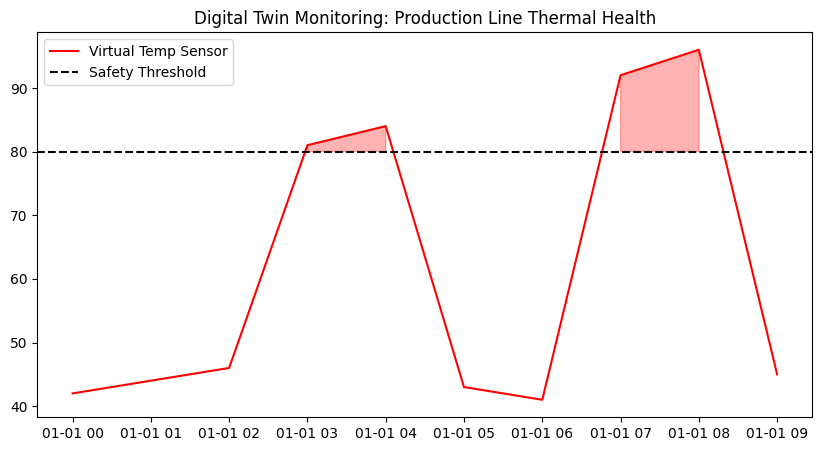

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PERCEPTION LAYER: DATA INGESTION
# Simulation using the IOT-temp.csv/Kaggle dataset structure
data = {
    'Timestamp': pd.date_range(start='2026-01-01', periods=10, freq='H'),
    'Pump_ID': ['P-500']*10,
    'Pressure_PSI': [1150, 1180, 1210, 1550, 1590, 1120, 1080, 1820, 1910, 1150],
    'Temp_C': [42, 44, 46, 81, 84, 43, 41, 92, 96, 45],
    'Vibration': [2.0, 2.1, 2.2, 5.5, 5.9, 2.1, 1.9, 8.2, 8.8, 2.1]
}
df = pd.DataFrame(data)

# 2. PROCESSING LAYER: DIGITAL TWIN LOGIC & SECURITY
# Applying thresholds based on Assignment 3 Security Principles
TEMP_LIMIT = 80
PRESSURE_LIMIT = 1500

def get_twin_status(row):
    # Integrity check: Reject impossible values (Security Principle 5)
    if row['Temp_C'] > 200 or row['Pressure_PSI'] < 0:
        return "DATA_ERROR: Sensor Tampering Suspected"

    # Predictive Maintenance Logic
    if row['Temp_C'] > TEMP_LIMIT or row['Pressure_PSI'] > PRESSURE_LIMIT:
        return "CRITICAL: Schedule Maintenance"
    return "OPERATIONAL: Healthy"

df['Digital_Twin_Status'] = df.apply(get_twin_status, axis=1)

# 3. APPLICATION LAYER: DATA TABLE & VISUALIZATION
print("--- DIGITAL TWIN SYNCHRONIZED TABLE ---")
display(df)  # U HAVE TO SCREEN THIS TABLE

# 4. FIRST FUNCTIONAL VISUALIZATION
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Temp_C'], color='red', label='Virtual Temp Sensor')
plt.axhline(y=TEMP_LIMIT, color='black', linestyle='--', label='Safety Threshold')
plt.fill_between(df['Timestamp'], df['Temp_C'], TEMP_LIMIT, where=(df['Temp_C'] > TEMP_LIMIT), color='red', alpha=0.3)
plt.title("Digital Twin Monitoring: Production Line Thermal Health")
plt.legend()
plt.show() # U HAVE TO SCREEN THIS GRAPH